# Classifier execution: Linear Regression

### Process Flow :

1. load **binary dataset**
2. setup training and testing 
3. generate assessments for the following classifiers:
    * linear
    * logistic

### Input data

**binary dataset**: from RTA_DS_Classifiers

### Output data

* saved data assessment plot (.png) snapshots: for each classifier


## Import external libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import time

## 'Import' RTAutilities

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from numpy import ravel

def RTA_Classifier(df, classifier, predictor, feature):    
    X = pd.DataFrame(df[feature])
    y = pd.DataFrame(df[predictor])
    lr = LinearRegression(n_jobs=1,fit_intercept=True)
    logreg = linear_model.LogisticRegression(C=1e5)
    plt.ylabel(predictor)
    plt.xlabel(feature)
        
    if classifier == 'linear':
        lr = LinearRegression(n_jobs=1,fit_intercept=True)
        lr.fit(X,y)
        clf_p = lr.predict(X)
        plt.scatter(df[feature], df[predictor])
        plt.plot(df[feature], clf_p, color='red')
    elif classifier == 'logistic':
        plt.figsize=(9, 6)
        #plt.xticks(range(0, 20010, 5000))
        plt.yticks([0, 0.5, 1])
        plt.ylim(-0.1, 1.1)
        #plt.xlim(0, 20000)
        df.sort_values(feature, inplace=True) # replaced by ravel function??
        
        # Linear regression
        lr.fit(X,y)
        clf_plr = lr.predict(X)
        plt.scatter(df[feature], df[predictor], color='g', zorder=20)
        plt.plot(df[feature], clf_plr, color='blue')
        
        #Logistic regression
        logreg.fit(X,y)
        clf_plog = logreg.predict(X)
        #plt.scatter(df_X[feature].ravel(), df_X[predictor])
        plt.plot(df[feature].ravel(), clf_plog, color='red', zorder = 20)
        plt.legend(('Linear Regression Model', 'Logistic Regression Model'),
                   loc="best", fontsize='small')       

## Choose dataframe source

In [3]:
df_features = pd.read_pickle('Data/RTA_binary_dataset.pickle')

df_features[df_features < 1] = 0 # Some classifiers need to have positive integers
df_features = df_features.dropna() # removal of any residual NaN records
df_features = df_features.astype(np.int64, errors='ignore') #convert records to int

#df_RTA_all = df_RTA_all[df_RTA_all.latitude != 0]
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162781 entries, 0 to 162780
Data columns (total 29 columns):
accident_severity    162781 non-null int64
Motorway             162781 non-null int64
A_road               162781 non-null int64
B_road               162781 non-null int64
C_road               162781 non-null int64
Sun                  162781 non-null int64
Mon                  162781 non-null int64
Tue                  162781 non-null int64
Wed                  162781 non-null int64
Thu                  162781 non-null int64
Fri                  162781 non-null int64
Sat                  162781 non-null int64
sl_20                162781 non-null int64
sl_30                162781 non-null int64
sl_40                162781 non-null int64
sl_50                162781 non-null int64
sl_60                162781 non-null int64
Junction             162781 non-null int64
rsurface             162781 non-null int64
light                162781 non-null int64
v_car                162781 n

### Linear regression

#### Engine size v Driver age 

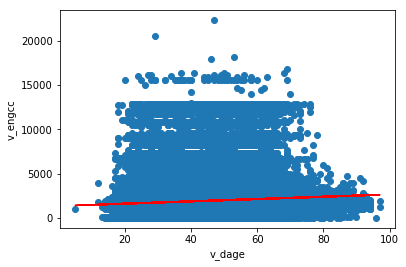

In [4]:
dataset = df_features
#dataset = df_features[df_features.v_other == True]

RTA_Classifier(dataset, 'linear', 'v_engcc', 'v_dage')
plt.show()

plt.savefig('Data/Pics/cv_binary_eng_dri_.png')

#### Vehicle age vs Driver age

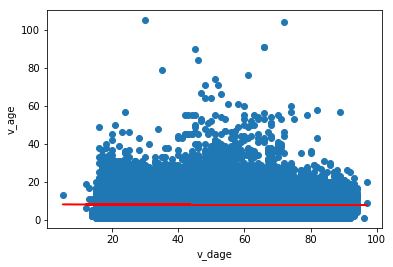

In [5]:
dataset = df_features
#dataset = df_features[df_features.v_other == True]

RTA_Classifier(dataset, 'linear', 'v_age', 'v_dage')
plt.show()

plt.savefig('Data/Pics/cv_binary_veh_dri_.png')

#### Car vs engine size

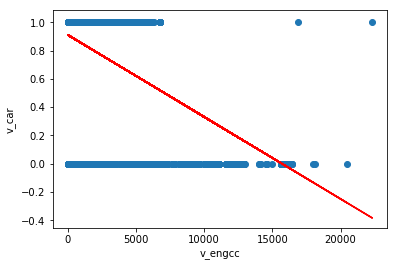

In [6]:
dataset = df_features
#dataset = df_features[df_features.v_other == True]

RTA_Classifier(dataset, 'linear', 'v_car', 'v_engcc')
plt.show()

plt.savefig('Data/Pics/cv_binary_car_eng_.png')

### Logistic regression

#### Car engine size

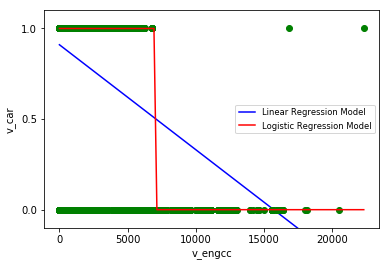

In [9]:
dataset = df_features
#dataset = df_features[df_features.v_other == True]

RTA_Classifier(dataset, 'logistic', 'v_car', 'v_engcc')
plt.show()

plt.savefig('Data/Pics/cv_binary_car_eng_.png')

#### Bike engine size

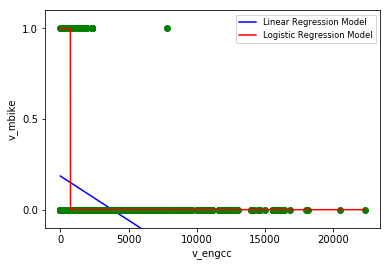

In [8]:
dataset = df_features
#dataset = df_features[df_features.v_other == True]

RTA_Classifier(dataset, 'logistic', 'v_mbike', 'v_engcc')
plt.show()

plt.savefig('Data/Pics/cv_binary_mbike_eng_.png')